<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/pixels_seg_ML_save_trained_model_1_multi_CLFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Linear SVM  CLF: Feature extraction time = H:M:S 0 : 1 : 1
Linear SVM  CLF: Train time = H:M:S 0 : 0 : 12
Linear SVM  CLF: Test time = H:M:S 0 : 0 : 16
Linear SVM  CLF: Total time = H:M:S 0 : 1 : 30
Accuracy on training data =  99.919 %
Accuracy on testing data =  99.923 %
name RBF SVM


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RBF SVM  CLF: Feature extraction time = H:M:S 0 : 1 : 1
RBF SVM  CLF: Train time = H:M:S 0 : 0 : 52
RBF SVM  CLF: Test time = H:M:S 0 : 1 : 12
RBF SVM  CLF: Total time = H:M:S 0 : 3 : 6
Accuracy on training data =  91.258 %
Accuracy on testing data =  91.321 %
name Decision Tree
Decision Tree  CLF: Feature extraction time = H:M:S 0 : 1 : 1
Decision Tree  CLF: Train time = H:M:S 0 : 2 : 27
Decision Tree  CLF: Test time = H:M:S 0 : 2 : 27
Decision Tree  CLF: Total time = H:M:S 0 : 5 : 56
Accuracy on training data =  100.0 %
Accuracy on testing data =  100.0 %
name Random Forest
Random Forest  CLF: Feature extraction time = H:M:S 0 : 1 : 1
Random Forest  CLF: Train time = H:M:S 0 : 3 : 13
Random Forest  CLF: Test time = H:M:S 0 : 3 : 17
Random Forest  CLF: Total time = H:M:S 0 : 7 : 32
Accuracy on training data =  99.905 %
Accuracy on testing data =  99.906 %
name Neural Net
Neural Net  CLF: Feature extraction time = H:M:S 0 : 1 : 1
Neural Net  CLF: Train time = H:M:S 0 : 7 : 53
Neural Ne

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA  CLF: Feature extraction time = H:M:S 0 : 1 : 1
QDA  CLF: Train time = H:M:S 0 : 8 : 11
QDA  CLF: Test time = H:M:S 0 : 8 : 12
QDA  CLF: Total time = H:M:S 0 : 17 : 25
Accuracy on training data =  98.361 %
Accuracy on testing data =  98.366 %


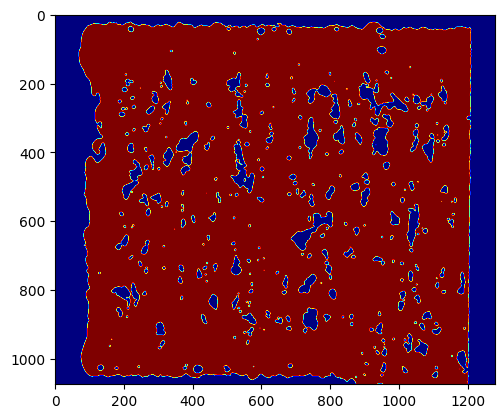

In [1]:

## source: DigitalSreeni 

import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import time

#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread('/content/001_cropped.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()

t0 = time.time()   ## starting time

df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
########################################
#Gerate OTHER FEATURES out of pixels and add them to the data frame
                
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe

feat_ext_time = time.time()-t0
local_time_feature_rxtraction = time.localtime(feat_ext_time)
###########################               

#Now, add a column in the data frame for the Labels
#For this, we need to import the labeled image
# labeled_img = cv2.imread('/content/Sandstone_Versa0000(mask).tif')  # if we use saved mask
 ########################## if we do not use ready saved mask
ret, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY) ## I will assume our mask is the binary image
#imshow(binary.reshape(img.shape))

plt.imshow(binary, cmap ='jet')
labeled_img =binary
############################
#Remember that you can load an image with partial labels 
#But, drop the rows with unlabeled data

#labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY) # if we use mask
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

print('the unique labels', df['Labels'].unique())
print('the count of the unique labels', df['Labels'].value_counts())
# df = df[df['Labels'] != 0] ## to remove the pixels of the background which not represensetive to our objects
print(df.head())

df.to_csv("pixels_features_and_lables.csv")
#############################
#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)
############################### list of classifieres:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

##https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# names = ["Nearest Neighbors", "Linear SVM","RBF SVM","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes", "QDA"]
# ##,"Gaussian Process"
# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     #GaussianProcessClassifier(1.0 * RBF(1.0),random_state = 42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]
## , random_state=42


names = ["Linear SVM","RBF SVM","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes", "QDA"]
##,"Gaussian Process"
classifiers = [
    SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
    SVC(gamma=2, C=1, max_iter=100, random_state=42),
    #GaussianProcessClassifier(1.0 * RBF(1.0),random_state = 42),
    DecisionTreeClassifier(max_depth=5, random_state = 42),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state = 42),
    MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

############################### 
# Import the model we are using RandomForestRegressor 

start_train_time = time.time()
for name, model in zip(names, classifiers):
  print('name', name)
  # Train the model on training data
  model.fit(X_train, y_train)
  train_time = time.time()-start_train_time
  local_train_time = time.localtime(train_time)

  # verify number of trees used. If not defined above. 
  #print('Number of Trees used : ', model.n_estimators)

  #STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA AND CALCULATE THE ACCURACY SCORE
  #First test prediction on the training data itself. SHould be good. 
  prediction_test_train = model.predict(X_train)
  start_test_time = time.time()-train_time

  #Test prediction on testing data. 
  prediction_test = model.predict(X_test)

  test_time = time.time()-start_test_time
  local_test_time = time.localtime(test_time)
  print(name, ' CLF: Feature extraction time = H:M:S', local_time_feature_rxtraction.tm_hour,':',local_time_feature_rxtraction.tm_min,':',local_time_feature_rxtraction.tm_sec)
  print(name, ' CLF: Train time = H:M:S', local_train_time.tm_hour,':',local_train_time.tm_min,':',local_train_time.tm_sec)
  print(name, ' CLF: Test time = H:M:S', local_test_time.tm_hour,':',local_test_time.tm_min,':',local_test_time.tm_sec)
  total_time = feat_ext_time+train_time+test_time
  total_time = time.localtime(total_time)
  print(name, ' CLF: Total time = H:M:S', total_time.tm_hour,':',total_time.tm_min,':',total_time.tm_sec)

  #.predict just takes the .predict_proba output and changes everything to 0 below a certain threshold (usually 0.5) respectively to 1 above that threshold.
  #In this example we have 2 labels, so the probabilities will for each label stored separately. 

  #prediction_prob_test = model.predict_proba(X_test)

  #Let us check the accuracy on test data
  from sklearn import metrics
  #Print the prediction accuracy

  #First check the accuracy on training data. This will be higher than test data prediction accuracy.
  train_acc = metrics.accuracy_score(y_train, prediction_test_train)*100
  print ("Accuracy on training data = ", round(train_acc,3), '%')
  #Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
  test_acc = metrics.accuracy_score(y_test, prediction_test)*100
  print ("Accuracy on testing data = ", round(test_acc,3), '%')

  #This part commented out for SVM testing. Uncomment for random forest. 
  #One amazing feature of Random forest is that it provides us info on feature importances
  # Get numerical feature importances importances = list(model.feature_importances_)

  # feature_list = list(X.columns)
  # feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
  # print('The scors or important features',feature_imp)
  # feature_imp.to_csv("important_features.csv")

  #You can store the model for future use. In fact, this is how you do machine elarning
  #Train on training images, validate on test images and deploy the model on unknown images. 

  import pickle

  #Save the trained model as pickle string to disk for future use
  filename = "/content/CLF_res/{}_trained_model".format(name)

  pickle.dump(model, open(filename, 'wb'))

  #To test the model on future datasets
  loaded_model = pickle.load(open(filename, 'rb'))
  result = loaded_model.predict(X)

  segmented = result.reshape((img.shape))

  plt.imshow(segmented, cmap ='jet')
  plt.imsave('/content/CLF_res/predicted_image_{}.jpg'.format(name), segmented, cmap ='jet')

In [2]:
from google.colab import files
!zip -r /content/CLF_res.zip /content/CLF_res
files.download('/content/CLF_res.zip')

  adding: content/CLF_res/ (stored 0%)
  adding: content/CLF_res/predicted_image_Neural Net.jpg (deflated 19%)
  adding: content/CLF_res/AdaBoost_trained_model (deflated 62%)
  adding: content/CLF_res/Decision Tree_trained_model (deflated 51%)
  adding: content/CLF_res/predicted_image_Decision Tree.jpg (deflated 18%)
  adding: content/CLF_res/predicted_image_RBF SVM.jpg (deflated 38%)
  adding: content/CLF_res/predicted_image_Naive Bayes.jpg (deflated 19%)
  adding: content/CLF_res/predicted_image_Random Forest.jpg (deflated 19%)
  adding: content/CLF_res/Random Forest_trained_model (deflated 70%)
  adding: content/CLF_res/predicted_image_QDA.jpg (deflated 19%)
  adding: content/CLF_res/predicted_image_AdaBoost.jpg (deflated 18%)
  adding: content/CLF_res/Naive Bayes_trained_model (deflated 38%)
  adding: content/CLF_res/Neural Net_trained_model (deflated 4%)
  adding: content/CLF_res/QDA_trained_model (deflated 33%)
  adding: content/CLF_res/RBF SVM_trained_model (deflated 83%)
  addi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
##rm -rf '/content/CLF_res' ## dengarous will delete all the folder 